In [1]:
#http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf
#Pos 1 NG 0

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [75]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [76]:
print("Number of train datas: ",len(X_train))
print("Number of test datas: ",len(X_test))
print("Category: ",set(y_train))

Number of train datas:  25000
Number of test datas:  25000
Category:  {0, 1}


In [11]:
print(X_train[:3],"\n")
print(y_train[:3])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [12]:
reviews_length = [len(review) for review in X_train]

print("Maximum length of reviews: ",np.max(reviews_length))
print("Mean length of reviews: ",np.mean(reviews_length))
print("Minimum length of reviews: ",np.min(reviews_length))

Maximum length of reviews:  2494
Mean length of reviews:  238.71364
Minimum length of reviews:  11


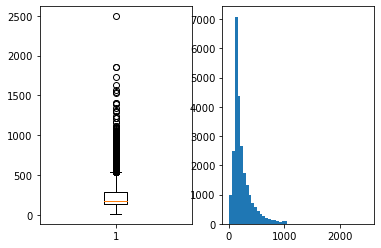

In [14]:
plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [25]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(unique_elements[0], "'s frequency =", counts_elements[0])
print(unique_elements[1], "'s frequency =", counts_elements[1])

0 's frequency = 12500
1 's frequency = 12500


In [77]:
word_to_index = imdb.get_word_index()

In [78]:
index_to_word = {}
for key, value in word_to_index.items() :
    index_to_word[value+3] = key  #In the research, 0~3 are for special token

In [79]:
[print(i, " ", index_to_word[i]) for i in range(4,15)]

4   the
5   and
6   a
7   of
8   to
9   is
10   br
11   in
12   it
13   i
14   this


[None, None, None, None, None, None, None, None, None, None, None]

In [80]:
len(word_to_index)

88584

In [81]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")) :
    index_to_word[index] = token

In [82]:
for i in range(3) :
    print(" ".join([index_to_word[index] for index in X_train[i]]), "\n")

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [22]:
#Padding

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

In [24]:
vocab_size = 20000
max_len = 750

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [25]:
print(X_train.shape)
print(X_test.shape)

(25000, 750)
(25000, 750)


In [26]:
#Model

In [27]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GRU, Embedding, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
embedding_dim = 100
hidden_units = 128

inputs = Input(shape=(max_len))
model = Embedding(vocab_size, embedding_dim)(inputs)
model = GRU(hidden_units)(model)
output = Dense(1, activation="sigmoid")(model)

model = Model(inputs=inputs, outputs=output)

In [29]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=4)
mc = ModelCheckpoint("Models/IMDB_GRU_model.h5", monitor="val_accuracy", mode="max", verbose=1, save_best_only=True)

In [30]:
model.compile(optimizer="nadam", loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
hitory = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.7690
Epoch 1: val_accuracy improved from -inf to 0.87100, saving model to Models\IMDB_GRU_model.h5
625/625 [==============================] - 23s 34ms/step - loss: 0.4664 - accuracy: 0.7690 - val_loss: 0.3293 - val_accuracy: 0.8710
Epoch 2/15
625/625 [==============================] - ETA: 0s - loss: 0.3236 - accuracy: 0.8666
Epoch 2: val_accuracy did not improve from 0.87100
625/625 [==============================] - 21s 33ms/step - loss: 0.3236 - accuracy: 0.8666 - val_loss: 0.3280 - val_accuracy: 0.8632
Epoch 3/15
625/625 [==============================] - ETA: 0s - loss: 0.1848 - accuracy: 0.9308
Epoch 3: val_accuracy improved from 0.87100 to 0.88880, saving model to Models\IMDB_GRU_model.h5
625/625 [==============================] - 21s 33ms/step - loss: 0.1848 - accuracy: 0.9308 - val_loss: 0.2815 - val_accuracy: 0.8888
Epoch 4/15
625/625 [==============================] - ETA: 0s - loss: 0

In [32]:
loaded_model = load_model("Models/IMDB_GRU_model.h5")
 = loaded_model.evaluate(X_test, y_test)

782/782 [==============================] - 11s 14ms/step - loss: 0.3085 - accuracy: 0.8767


In [43]:
print("Test Accuracy: %.2f%%" %(test_acc[1]*100))

Test Accuracy: 87.67%


In [58]:
#pre-processing for random review
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [86]:
def sentiment_predict(new_sentence) :
    new_sentence = text_to_word_sequence(new_sentence)
    
    encoded = []
    
    for word in new_sentence :
        try :
            if word_to_index[word] <= vocab_size :
                encoded.append(word_to_index[word]+3)
            else :
                encoded.append(2) #<unk>
        except :
            encoded.append(2) #<unk>
            
    pad_sequence = pad_sequences([encoded], maxlen=max_len)
    
    score = float(loaded_model.predict(pad_sequence))
    
    if(score > 0.5) :
        print("%.2f%% chance of being positive." %(score*100))
    elif(score == 0.5) :
        print("Neutral")
    else :
        print("%.2f%% chance of being negative." %((1-score)*100))

In [54]:
Avata_The_way_of_water_9point_review = """It's hard to believe the sequel to Avatar has actually come out. After 13 years and what feels like half-a-dozen delays, it's officially here.

As someone who was surprised by how much that 2009 movie held up on a recent viewing, and therefore had high expectations for a sequel, I'd say it lived up to the hype. Maybe it's a little less great, but I'd have to sit with it a little while longer before I could be sure.

First of all, this movie is long. 192 minutes long. I didn't feel the length, in all honesty. I got wrapped up in the movie and how it looked and sounded so much that it probably could have gone on another hour and I still wouldn't have felt restless. It's one of the best-paced 3+ hour movies I've ever seen... and you could argue it's even paced a little too fast in the first act, thanks to a time-skip that means the viewer has to be caught up to speed quickly.

Visually and effects-wise, it's perfect. Numerous expensive blockbusters are released every year, but few are given the time that Avatar 2's clearly been given. As such, it looks leagues better than any other $100 million-plus movie released in the last few years. The 3D is great (not something I'd say often), and it finds stunning new areas of Pandora to explore, thanks to the extensive underwater scenes.

Story-wise, I'd say it's a little less predictable than the first, which has a story that seems to bother some people. If anything, James Cameron might only be criticised for borrowing too much from himself - introducing child characters made me think of Aliens and Terminator 2, while parts of the action scenes in Avatar 2 will look a little familiar to anyone who's seen Titanic, The Abyss, or even Terminator (1984).

There's a little corny dialogue, a couple of slightly clunky scenes early on, and a lack of a definitive climax, seeing as there are more sequels planned. There are problems, but they barely matter. The strengths of this movie are overwhelming, and make this a must-watch in cinemas. It just felt great to see a blockbuster like this again; it's been a while."""

In [55]:
Avata_The_way_of_water_3point_review = """Seriously, I've just come back from watching the film in the cinema in London and cannot recommend this film. I enjoyed the first Avatar, and was curious to see where the story would go and was also expecting a brilliant visual experience, but the story was a complete repeat of the first film (down to the same 'villain'), and the visuals were no big deal. I had expected MORE, especially after such a long wait for the sequel. The worst thing was how BORING it was, and how lame the plot was. Even the ending sucked. What was Cameron trying to do, rip off Titanic for the ending? Oh and the 'kids' were so irritating. They kept on saying 'bro' this, 'bro' that. Like seriously, I didn't give a damn about them and had expected Sam Worthington's character to still be the centre of the story, not his stupid kids. Oh and don't get me started on the teenage tarzan with dreadlocks kid that did nothing for 99% of the film.

Honestly, I really don't believe the great reviews here. They must be PR people writing them or people who have never seen good cinema before. I found it disrespectful to have a repeat of the first film's plot, albeit in a different setting. Not only that, but considering it was so BORING, and had cringeworthy dialogue, and the effects were overrated, I find it hard to believe that anyone would bother giving more than 5 stars, let alone seeing the 3rd instalment when it comes out. I certainly won't. I'm giving it 3 stars because I expected much more from the sequel. It's certainly no Aliens (now there's a great sequel folks)."""

In [56]:
Interstellar_10point_review = """A lot has been said and written about Interstellar. You can obviously take apart any movie that is out there. You'll either love this one or you won't. I kind of would have loved to have watched this on an IMAX screen, the sheer scope of the whole thing. It's just amazing, what Nolan has put on screen here. It's not only the visual experience (there is no 3D here by the way), it's the story/ride you take with it. It might be clear to some earlier than to others, where it's heading (no pun intended), but it doesn't change the fact that it's beautiful ... and terrifying at the same time.

Going out and saying this will be considered a classic, might not be too far stretched, but you still can never predict those things. The deserved love the movie gets on IMDb and other places would be an indicator that this will ring true though. The acting is really good, but I can understand if some people have issues with the ending. But the movie had to end in one way or another. It's the best possible way this could go, even if it's not in our grasps just yet ..."""

In [66]:
Avengers_Endgame_10point_review = """ I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios.
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed.
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."""

In [88]:
Joker_5point_review = """They say it's all in the writing. And this is a great example of that. Good acting and production values cannot save a script steeped in tiresome stereotypes and a failure to delve into a character's identity. We meet the Joker when already imbalanced and his so-called descent into madness is really a couple weeks away; far from a descent, it's a stroll. This is not a character study, despite claims to the contrary. It's a showcase of a good actor overly contorting his body and laughing manically as a mistaken expression of madness. Where is the past? Where are the influences? Where are the conflicts? What are the seminal moments that create the spiral? Perhaps if he had really had that relationship, and had it gone sour, it would justify a descent. Instead, it's a fait accompli. This is lazy writing, focused more on fancy long shots of Joaquin Phoenix dancing crazily than producing something of value to the franchise."""

In [89]:
sentiment_predict(Avata_The_way_of_water_9point_review)
sentiment_predict(Avata_The_way_of_water_3point_review)
sentiment_predict(Interstellar_10point_review)
sentiment_predict(Avengers_Endgame_10point_review)
sentiment_predict(Joker_5point_review)

1/1 [==============================] - 0s 30ms/step
63.31% chance of being positive.
1/1 [==============================] - 0s 30ms/step
98.06% chance of being negative.
1/1 [==============================] - 0s 31ms/step
90.12% chance of being positive.
1/1 [==============================] - 0s 31ms/step
98.82% chance of being positive.
1/1 [==============================] - 0s 30ms/step
98.73% chance of being negative.
